In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from plotfunctions import plot_range, show_map

from sklearn.metrics import auc
import data_loader
from data_loader import *


## Fashion MNIST



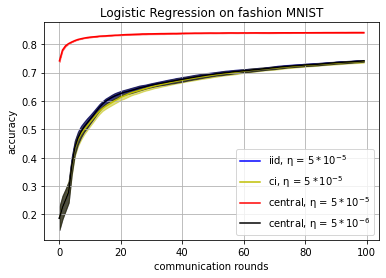

In [2]:
LR_dict = load_f_LR()

plot_range(LR_dict["iid"].T[:,0:100], color="b")
plot_range(LR_dict["ci"].T[:,0:100], color="y")
plot_range(LR_dict["central 5e5"].T[:,0:100], color="r")
plot_range(LR_dict["central 5e6"].T, color="k")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("Logistic Regression on fashion MNIST")
plt.legend(["iid, \u03B7 = $5*10^{-5}$","ci, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-6}$"], loc=4)


Text(0.5, 1.0, 'CNN on fashion MNIST')

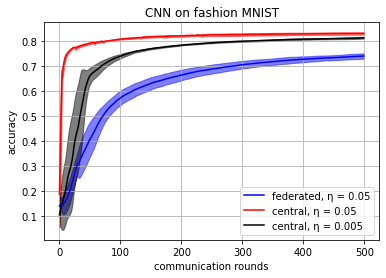

In [32]:
CNN_dict = load_f_CNN()

plot_range(CNN_dict["iid"].T, color="b")
plot_range(CNN_dict["cent 5e2"].T, color="r")
plot_range(CNN_dict["cent 5e3"].T, color="k")
plt.legend(["federated, \u03B7 = 0.05","central, \u03B7 = 0.05", "central, \u03B7 = 0.005"],loc=4)
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("CNN on fashion MNIST")

Text(0.5, 1.0, 'GBDT on fashion MNIST')

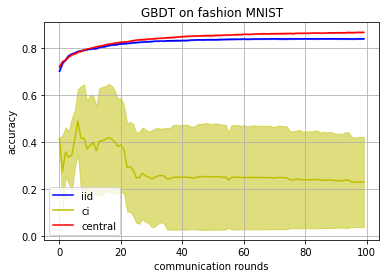

In [12]:
DT_dict = load_f_DT()

plot_range(DT_dict["iid"].T, color="blue")
plot_range(DT_dict["ci"].T, color="y")
plot_range(DT_dict["cent"].T, color="r")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid", "ci", "central"])
plt.title("GBDT on fashion MNIST")

## A2

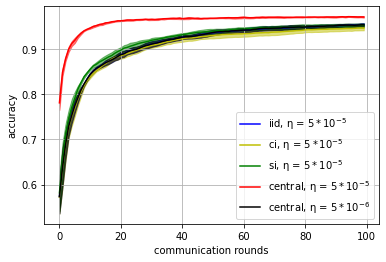

In [42]:
SVM_dict = load_A2_SVM()

plot_range(SVM_dict["iid"].T, color="b")
plot_range(SVM_dict["ci"].T, color="y")
plot_range(SVM_dict["si"].T, color="g")
plot_range(SVM_dict["central"].T[:,0:100], color="r")
plot_range(SVM_dict["central 5e6"].T[:,0:100], color="k")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid, \u03B7 = $5*10^{-5}$","ci, \u03B7 = $5*10^{-5}$","si, \u03B7 = $5*10^{-5}$" ,"central, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-6}$"], loc=4)


## AML

Text(0.5, 1.0, 'Logistic Regression on AML')

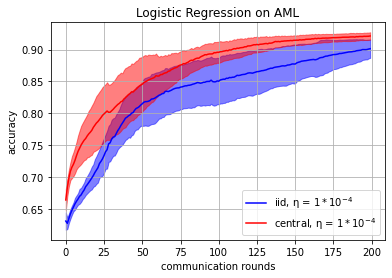

In [6]:
LR_dict = load_3node_LR()

plot_range(LR_dict["iid"], color="b")
plot_range(LR_dict["central"], color="r")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid, \u03B7 = $1*10^{-4}$","central, \u03B7 = $1*10^{-4}$"], loc=4)
plt.title("Logistic Regression on AML")


Text(0, 0.5, 'accuracy')

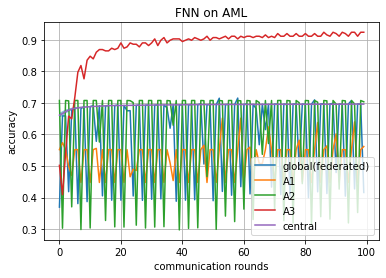

In [63]:
FNN_dict = load_3node_FNN()

plt.plot(np.arange(100), FNN_dict["ci"])
for i in range(3):
    plt.plot(np.arange(100), FNN_dict["ci local"][i,:,:])
plot_range(FNN_dict["central"])
plt.legend(["global(federated)", "A1", "A2", "A3", "central"])
plt.title("FNN on AML")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")

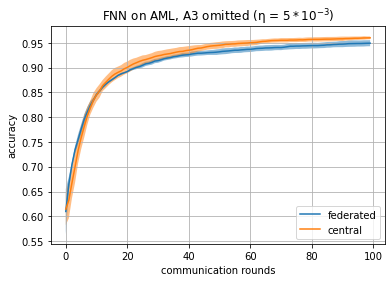

In [5]:
FNN_dict = load_2node_FNN()

plot_range(FNN_dict["iid"].T)
plot_range(FNN_dict["central"])
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("FNN on AML, A3 omitted (\u03B7 = $5*10^{-3}$)")
plt.legend(["federated", "central"])

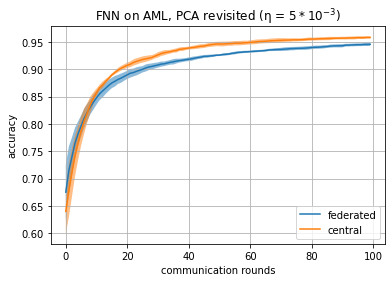

In [4]:
FNN_dict = load_3node_FNN()

plot_range(FNN_dict["redemp g"])
plot_range(FNN_dict["redemp central"])
#plot_range(FNN_dict["redemp central lr"])
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("FNN on AML, PCA revisited (\u03B7 = $5*10^{-3}$)")
plt.legend(["federated", "central"])